In [1]:
import data_cleaning
import dataprocessing
import pandas as pd
import visualization
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import normalize, MinMaxScaler, Normalizer

In [5]:
df = data_cleaning.pd_load_data()

In [614]:

df['DISCOVERY_MONTH'] = df['DISCOVERY_DATE'].dt.month
df['DISCOVERY_YEAR'] = df['DISCOVERY_DATE'].dt.year
df['DISCOVERY_QUARTER'] = df['DISCOVERY_DATE'].dt.quarter
tmp = df[['DISCOVERY_MONTH','DISCOVERY_YEAR', 'DISCOVERY_QUARTER', 'FIRE_SIZE_CLASS', 'FIRE_SIZE', 'STAT_CAUSE_DESCR','STATE']].reset_index()

df = dataprocessing.convertTime(df)

df['DISCOVERY_TIME_HOUR'] = df['DISCOVERY_TIME'].dt.hour
# df['DISCOVERY_TIME_HOUR'] = df['DISCOVERY_TIME'].dt.hour
df['COTAINTED_DAYS'] = (df['CONT_DATE'] - df['DISCOVERY_DATE']).dt.days

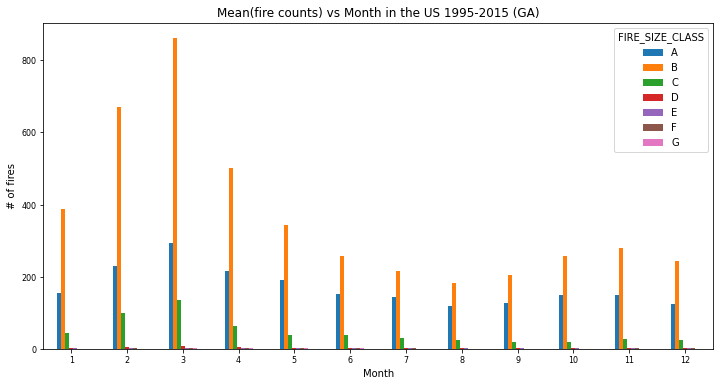

In [101]:
# df.reset_index().groupby(['DISCOVERY_TIME_HOUR', 'STATE']).agg({'FPA_ID':'count'})['FPA_ID'].unstack(level=-1).plot(subplots=True,kind = 'bar', xlabel ='Time', ylabel='Number of records', rot=60, title='# of fire records per hour (24HR) for each state', figsize = (12, 104))
# df[df['STATE'] == 'GA'].reset_index().groupby(['FIRE_SIZE_CLASS', 'DISCOVERY_YEAR','DISCOVERY_MONTH','STAT_CAUSE_DESCR']).agg({'FPA_ID':'count'}).unstack(level=0)['FPA_ID'].groupby(['DISCOVERY_MONTH','STAT_CAUSE_DESCR']).mean().unstack(level=-1).plot(subplots=True,kind='bar',figsize=(12,240), title='Mean(fire counts) per causation vs Month in the US 1995-2015 (GA)', xlabel = 'Month', ylabel = '# of fires', fontsize=8, rot=0)[0].get_figure().savefig('somethingnex.jpg')
df[df['STATE'] == 'GA'].reset_index().groupby(['FIRE_SIZE_CLASS', 'DISCOVERY_YEAR','DISCOVERY_MONTH']).agg({'FPA_ID':'count'}).unstack(level=0)['FPA_ID'].groupby(['DISCOVERY_MONTH']).mean().plot(kind='bar',figsize=(12,6), title='Mean(fire counts) vs Month in the US 1995-2015 (GA)', xlabel = 'Month', ylabel = '# of fires', fontsize=8, rot=0).get_figure().savefig('somethingnex.jpg')






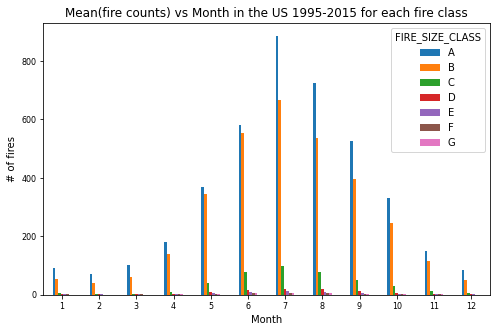

In [114]:
df[df['STATE'] == 'CA'].reset_index().groupby(['FIRE_SIZE_CLASS', 'DISCOVERY_YEAR','DISCOVERY_MONTH']).agg({'FPA_ID':'count'}).unstack(level=0)['FPA_ID'].groupby(['DISCOVERY_MONTH']).mean().plot(kind='bar',figsize=(8,5), title='Mean(fire counts) vs Month in the US 1995-2015 for each fire class', xlabel = 'Month', ylabel = '# of fires', fontsize=8, rot=0).get_figure().savefig('somethingnex.jpg')


In [261]:
tmp = df.reset_index().groupby(['FIRE_SIZE_CLASS', 'DISCOVERY_YEAR', 'DISCOVERY_MONTH']).agg({'FPA_ID':'count'})['FPA_ID'].unstack(level=0)

In [264]:
tmp['A'].to_numpy()

array([ 762., 1269., 1464., 1784., 3198., 4189., 4218., 4407., 2031.,
       1406.,  487.,  325.,  343.,  814.,  847., 1766., 2214., 2442.,
       3390., 3766., 2101., 1552., 1074.,  456.,  711.,  946., 1974.,
       2591., 2420., 2599., 6555., 4748., 2839., 1188.,  881.,  450.,
        394.,  943., 2073., 2790., 1925., 2254., 4118., 3226., 3155.,
       1320.,  879.,  836.,  649., 1546., 1675., 2412., 2261., 2698.,
       4817., 4735., 2024., 1297.,  631.,  375.,  516.,  718., 1588.,
       2658., 2600., 2049., 4076., 3156., 2326., 1131.,  491.,  355.,
        297.,  483., 1197., 2113., 1725., 2405., 4726., 4143., 2708.,
       1691., 1103.,  817.,  762., 1142., 2173., 2770., 2305., 2639.,
       3752., 5408., 2668., 1619., 1469.,  855., 1498., 3131., 3243.,
       2348., 2980., 3670., 5012., 5601., 1874., 1989., 1018.,  699.,
       1146., 1289., 1328., 2375., 3122., 2799., 5770., 4202., 2767.,
       2336., 3143.,  854.,  951., 1943., 1981., 2319., 2734., 2839.,
       5751., 4239.,

In [160]:
# tmp[tmp['F'].notnull()]
# np.array(tmp.index).reshape(-1,1)

LinearRegression()

In [161]:
model.coef_

array([0.28956522])

In [203]:
tmp[1]fire_class

DISCOVERY_YEAR
1992    NaN
1993    NaN
1994    NaN
1995    NaN
1996    NaN
1997    NaN
1998    NaN
1999    NaN
2000    NaN
2001    1.0
2002    1.0
2003    1.0
2004    NaN
2005    NaN
2006    1.0
2007    NaN
2008    NaN
2009    NaN
2010    NaN
2011    NaN
2012    NaN
2013    NaN
2014    NaN
2015    1.0
Name: G, dtype: float64

In [ ]:
for fire_class in "ABCDEFG":
    fig, ax = plt.subplots(2, 2, sharex=True,figsize=(15,15))
    m = 1
    for i in [1,2]:
        for j in [0,1]:
    #         print()
            try:
                model = LinearRegression()
                model.fit(np.array(tmp[m][fire_class][tmp[m][fire_class].notnull()].index).reshape(-1,1), tmp[m][fire_class][tmp[m][fire_class].notnull()])
                print(f'slope = {model.coef_}, quarter = {m}')
                ax[i-1,j-1].plot(tmp[i+j][fire_class][tmp[m][fire_class].notnull()].index, tmp[m][fire_class][tmp[m][fire_class].notnull()])
                ax[i-1,j-1].plot(np.linspace(1992,2015,tmp[m][fire_class][tmp[m][fire_class].notnull()].shape[0]), model.predict(np.linspace(1992,2015,tmp[m][fire_class][tmp[m][fire_class].notnull()].shape[0]).reshape(-1, 1)))
                ax[i-1,j-1].set_title(f"National fire trend in the quarter {m} category ({fire_class})")
                ax[i-1,j-1].set_xlabel('Year')
                ax[i-1,j-1].set_ylabel('# of fires')
                ax[i-1,j-1].text(2,2, f"slope = {model.coef_}")
                m+=1
            except:
                m+=1
    fig.savefig(f'National,{fire_class}.jpg')

In [13]:
np.linspace(1992,2015,24)

array([1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015.])

In [14]:
new_model = sm.OLS( tmpfire_class,np.array(tmp.index).reshape(-1,1),)

In [15]:
res = new_model.fit()

In [16]:
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x1,0.0045,0.000,9.725,0.000,0.004,0.005


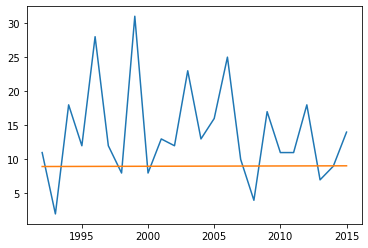

In [17]:
plt.plot(tmp.index, tmp['F'])
plt.plot(np.linspace(1992,2015,24),res.predict(np.array(tmp.index).reshape(-1,1)))

In [18]:
minmax = Normalizer()
res.params

x1    0.004495
dtype: float64

In [19]:
minmax.fit(tmp['F'].to_numpy().reshape(-1, 1))

Normalizer()

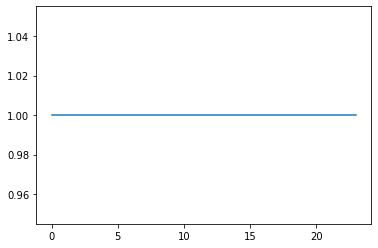

In [20]:
plt.plot(minmax.transform(tmp['F'].to_numpy().reshape(-1, 1)))

In [2]:
new_df = pd.read_csv('mydata.csv/part-00000-24b89373-8c25-4945-8ee9-74617d736e99-c000.csv', parse_dates = ['discovery_date', 'cont_date'])

In [37]:
# tmp = new_df.groupby(['fpa_id','stat_cause_descr', 'fire_size_class', 'latitude', 'longitude']).agg({'fpa_id':'count'})

In [25]:
labels = y['fire_size_class'].to_numpy().reshape(-1,1)


In [26]:
fire_cause = {}
for i,c in enumerate (list(x['stat_cause_descr'].drop_duplicates())):
    fire_cause[c] = i

In [27]:
from sklearn import svm

In [28]:
x['stat_cause_descr'] = x['stat_cause_descr'].map(fire_cause)

<ipython-input-28-21bb3746dfa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['stat_cause_descr'] = x['stat_cause_descr'].map(fire_cause)


In [29]:
x['stat_cause_descr']

fpa_id
2009CAIRS11144953    0
2009CAIRS11197068    1
2009CAIRS11246090    2
2009CAIRS11251868    3
2009CAIRS11551865    1
                    ..
WI-84091111998       1
WI-84091402000       6
WI-84091431999       4
WI-84091581998       2
WI-84091591998       1
Name: stat_cause_descr, Length: 109802, dtype: int64

In [40]:
df

,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_NAME,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,closet_station,distance,DISCOVERY_MONTH,DISCOVERY_YEAR,DISCOVERY_QUARTER
FPA_ID,,,,,,,,,,,,,,,,,,,
FS-1418851,FS,Eldorado National Forest,FORK,2004-07-01,1800.0,Lightning,2004-07-02,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,USR0000COWE,9.388820,7,2004,3
FS-1418861,FS,Eldorado National Forest,FORK #2,2004-07-02,1830.0,Lightning,2004-07-03,1900.0,0.10,A,38.691667,-120.159722,CA,17.0,USR0000COWE,8.722535,7,2004,3
FS-1418863,FS,Eldorado National Forest,MOKE #2,2004-07-02,1730.0,Lightning,2004-07-03,2000.0,0.10,A,38.527500,-120.106111,CA,5.0,USC00040595,10.003415,7,2004,3
FS-1418887,FS,Lincoln National Forest,SPRING,2004-06-04,1030.0,Lightning,2004-06-04,1400.0,0.10,A,33.440833,-105.720556,NM,27.0,USC00291120,3.434897,6,2004,2
FS-1418923,FS,National Forests in North Carolina,MOUNTAIN,2005-05-09,1900.0,Debris Burning,2005-05-09,2330.0,10.00,C,36.035000,-81.585000,NC,27.0,USC00316602,4.456911,5,2005,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009CAIRS12339007,ST/C&L,Siskiyou Unit,PATRICIA,2009-07-07,6.0,Arson,2009-07-07,59.0,0.10,A,41.968210,-122.304500,CA,NaN,USC00041990,3.032966,7,2009,3
2009CAIRS12335501,ST/C&L,Butte Unit,HWY 99 / ANITA RD,2009-07-10,1751.0,Missing/Undefined,NaT,NaN,1.00,B,39.811296,-121.916041,CA,NaN,US1CABT0017,2.448036,7,2009,3
2012CAIRS20707311,ST/C&L,Shasta-Trinity Unit,SHU LIGHTNING 1-1,2012-08-18,720.0,Miscellaneous,2012-08-19,2052.0,1.00,B,41.077600,-121.583650,CA,NaN,USC00042269,6.135010,8,2012,3


In [379]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

s_mod = SARIMAX(exog = tmp['A'].to_numpy()[:120], endog = [','.join(str(v) for v in i) for i in tmp.index.to_numpy()][:120],           order=(1,1,0), 
                seasonal_order=(1,0,0,12))

# model = s_mod.fit().predict()

# seas_d=sm.tsa.seasonal_decompose(,model='add',period=12);
# fig=seas_d.plot()
# fig.set_figheight(4)
# plt.show()


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

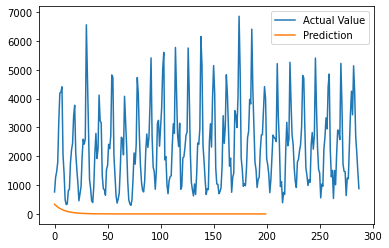

In [335]:
plt.plot(tmp['A'].to_numpy())
plt.plot(predictions.forecast(steps=200))
plt.legend(['Actual Value', 'Prediction'])

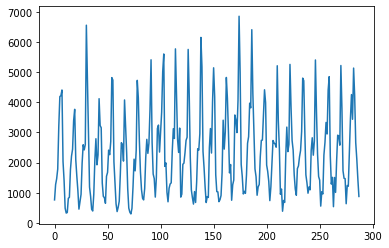

In [273]:
plt.plot(tmp['A'].to_numpy())

In [407]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [385]:
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled


In [394]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]


In [388]:
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


In [601]:
scaler, train_scaled, test_scaled = scale(tmp['B'][:240].to_numpy().reshape(-1, 1), tmp['B'][30:270].to_numpy().reshape(-1, 1))

In [ ]:
plt.plot(train_scaled[:100])
# plt.plot(test_scaled.shift(50))
test_scaled.reshape(1,-1,1)

In [604]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(train_scaled.shape[1], 1)))

model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


model.fit(x = train,y = test, epochs = 100, batch_size=32)

In [602]:
train = train_scaled.reshape(-1,1,1)

In [603]:
test = test_scaled.reshape(-1,1,1)

In [431]:
test.shape

(30, 8, 1)

In [ ]:
scaler.prediction.reshape(-1,1)

In [489]:

train_scaled.shape

(240, 1)

Epoch 1/100
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: nan
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 11/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 12/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 13/100
8/8 [==============================] - 0s 4ms/step - loss: nan
Epoch 14/100
8/8 [===

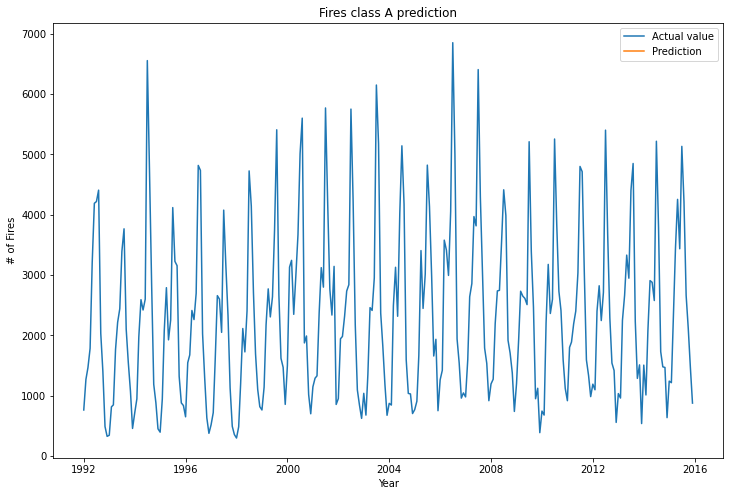

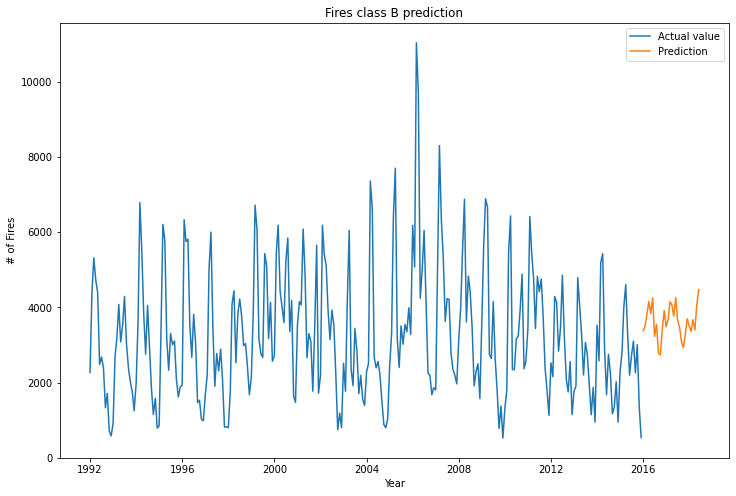

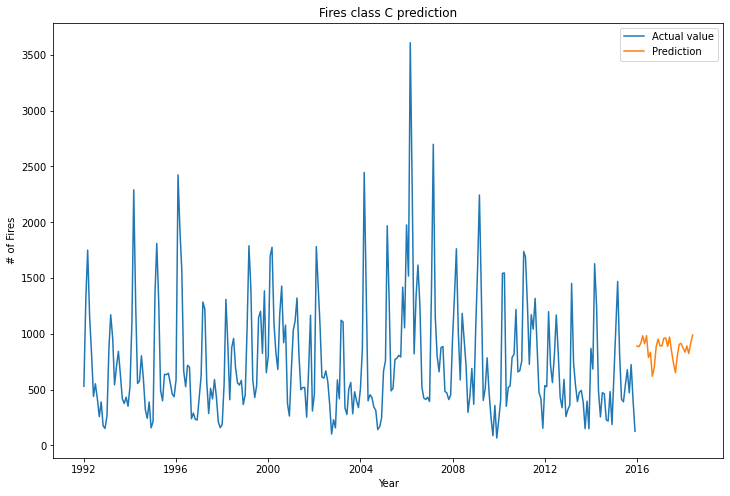

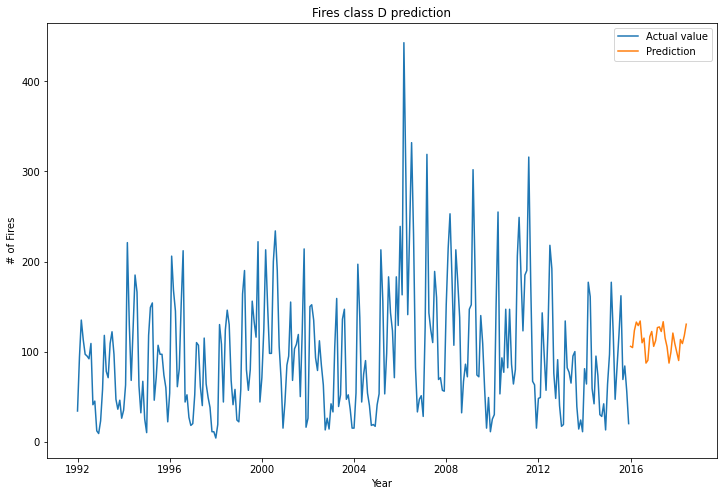

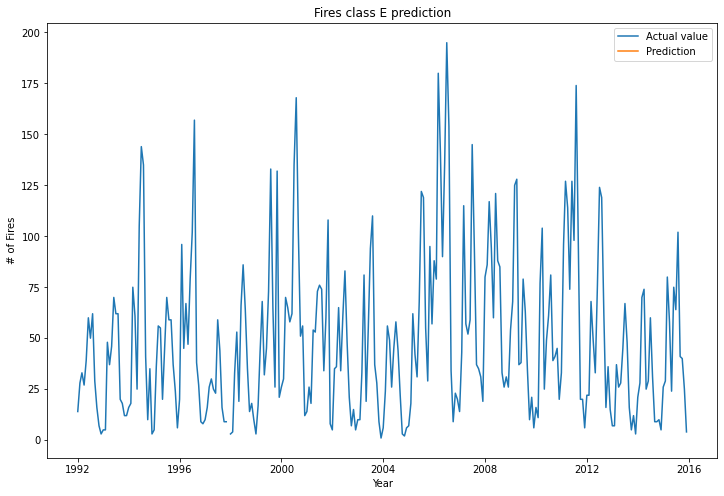

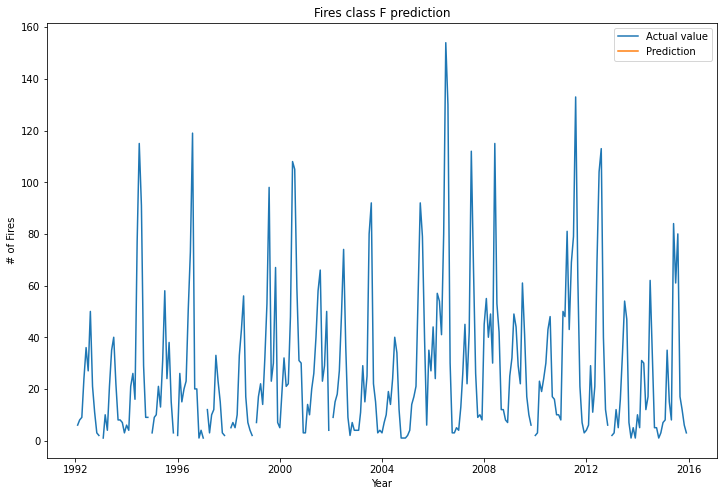

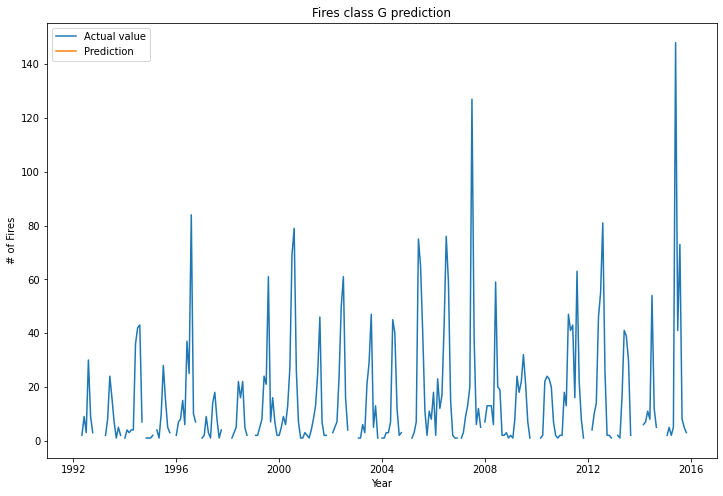

In [609]:
for class_name in 'ABCDEFG':
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(train_scaled.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.fit(x = train,y = test, epochs = 100, batc_size=32)
    scaler, train_scaled, test_scaled = scale(tmp[class_name][:240].to_numpy().reshape(-1, 1), tmp[class_name][30:270].to_numpy().reshape(-1, 1))
    train = train_scaled.reshape(-1,1,1)
    test = test_scaled.reshape(-1,1,1)
    model.fit(x = train,y = test, epochs = 100, batch_size=32)
    scaler, train_scaled, test_scaled = scale(tmp[class_name].to_numpy().reshape(-1, 1), tmp[class_name].to_numpy().reshape(-1, 1))
    plt.figure(figsize=(12,8))
    plt.plot(val,scaler.inverse_transform(train_scaled))
    plt.plot(dates_2,scaler.inverse_transform(model.predict(train_scaled[258:].reshape(-1,1,1))).reshape(-1,1))
    plt.legend(['Actual value', 'Prediction'])
    plt.title(f'Fires class {class_name} prediction')
    plt.xlabel('Year')
    plt.ylabel('# of Fires');
    plt.savefig(f'Fire {class_name} prediction.jpg')

In [527]:
prediction = np.append(np.repeat(np.nan,30),model.predict(train_scaled.reshape(-1,1,1)))

In [520]:
train_scaled.shape

(288, 1)

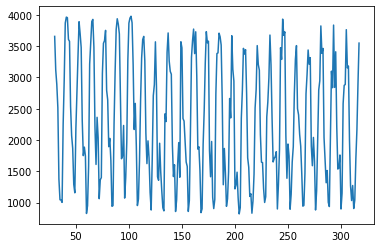

In [530]:
plt.plot(scaler.inverse_transform(prediction.reshape(-1,1)))

In [536]:
tmp.index

MultiIndex([(1992,  1),
            (1992,  2),
            (1992,  3),
            (1992,  4),
            (1992,  5),
            (1992,  6),
            (1992,  7),
            (1992,  8),
            (1992,  9),
            (1992, 10),
            ...
            (2015,  3),
            (2015,  4),
            (2015,  5),
            (2015,  6),
            (2015,  7),
            (2015,  8),
            (2015,  9),
            (2015, 10),
            (2015, 11),
            (2015, 12)],
           names=['DISCOVERY_YEAR', 'DISCOVERY_MONTH'], length=288)

In [608]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 1, 50)             10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)               

In [539]:
','.join(str(v) for v in value_list)


NameError: name 'value_list' is not defined

In [587]:
dates = pd.date_range(start='1992-01', end='2015-12', freq='MS').year.astype('str') + ', ' + pd.date_range(start='1992-01', end='2015-12', freq='MS').month.astype('str').str.zfill(2)

In [593]:
dates_2 = pd.date_range(start='2016-01', end='2018-06', freq='MS')

In [578]:
val = pd.to_datetime(tmp['A'].reset_index()['DISCOVERY_YEAR'].astype('str') + ", "+tmp['A'].reset_index()['DISCOVERY_MONTH'].astype('str').str.zfill(2))

In [590]:
dates_2.shape

(30,)

In [610]:
from sklearn.ensemble import RandomForestClassifier


In [612]:
df.groupby(['DISCOVERY_MONTH', 'STAT_CAUSE_DESCR', 'DISCOVERY_TIME', 'LATITUDE', 'LONGITUDE'])

,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_NAME,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,closet_station,distance,DISCOVERY_MONTH,DISCOVERY_YEAR,DISCOVERY_QUARTER
FPA_ID,,,,,,,,,,,,,,,,,,,
FS-1418851,FS,Eldorado National Forest,FORK,2004-07-01,1800.0,Lightning,2004-07-02,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,USR0000COWE,9.388820,7,2004,3
FS-1418861,FS,Eldorado National Forest,FORK #2,2004-07-02,1830.0,Lightning,2004-07-03,1900.0,0.10,A,38.691667,-120.159722,CA,17.0,USR0000COWE,8.722535,7,2004,3
FS-1418863,FS,Eldorado National Forest,MOKE #2,2004-07-02,1730.0,Lightning,2004-07-03,2000.0,0.10,A,38.527500,-120.106111,CA,5.0,USC00040595,10.003415,7,2004,3
FS-1418887,FS,Lincoln National Forest,SPRING,2004-06-04,1030.0,Lightning,2004-06-04,1400.0,0.10,A,33.440833,-105.720556,NM,27.0,USC00291120,3.434897,6,2004,2
FS-1418923,FS,National Forests in North Carolina,MOUNTAIN,2005-05-09,1900.0,Debris Burning,2005-05-09,2330.0,10.00,C,36.035000,-81.585000,NC,27.0,USC00316602,4.456911,5,2005,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009CAIRS12339007,ST/C&L,Siskiyou Unit,PATRICIA,2009-07-07,6.0,Arson,2009-07-07,59.0,0.10,A,41.968210,-122.304500,CA,NaN,USC00041990,3.032966,7,2009,3
2009CAIRS12335501,ST/C&L,Butte Unit,HWY 99 / ANITA RD,2009-07-10,1751.0,Missing/Undefined,NaT,NaN,1.00,B,39.811296,-121.916041,CA,NaN,US1CABT0017,2.448036,7,2009,3
2012CAIRS20707311,ST/C&L,Shasta-Trinity Unit,SHU LIGHTNING 1-1,2012-08-18,720.0,Miscellaneous,2012-08-19,2052.0,1.00,B,41.077600,-121.583650,CA,NaN,USC00042269,6.135010,8,2012,3


In [616]:
new_df

,_c0,fpa_id,nwcg_reporting_agency,nwcg_reporting_unit_name,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,cont_time,...,closest_station,distance,date,station,tmax,prcp,unix_weather_date,unix_fire_date,unix_2weeks,earliest_weather_date
0,107418,SFO-IA-2006-167,ST/C&L,Iowa Department of Natural Resources,NaN,2006-07-17,1650.0,Missing/Undefined,2006-07-17,NaN,...,USC00113455,6.885404,2006-07-09,USC00113455,30.0,0,1152428400,1153119600,1151910000,2006-07-03T00:00:00.000-07:00
1,107418,SFO-IA-2006-167,ST/C&L,Iowa Department of Natural Resources,NaN,2006-07-17,1650.0,Missing/Undefined,2006-07-17,NaN,...,USC00113455,6.885404,2006-07-15,USC00113455,31.7,0,1152946800,1153119600,1151910000,2006-07-03T00:00:00.000-07:00
2,107418,SFO-IA-2006-167,ST/C&L,Iowa Department of Natural Resources,NaN,2006-07-17,1650.0,Missing/Undefined,2006-07-17,NaN,...,USC00113455,6.885404,2006-07-06,USC00113455,27.2,0,1152169200,1153119600,1151910000,2006-07-03T00:00:00.000-07:00
3,107418,SFO-IA-2006-167,ST/C&L,Iowa Department of Natural Resources,NaN,2006-07-17,1650.0,Missing/Undefined,2006-07-17,NaN,...,USC00113455,6.885404,2006-07-17,USC00113455,35.0,0,1153119600,1153119600,1151910000,2006-07-03T00:00:00.000-07:00
4,107418,SFO-IA-2006-167,ST/C&L,Iowa Department of Natural Resources,NaN,2006-07-17,1650.0,Missing/Undefined,2006-07-17,NaN,...,USC00113455,6.885404,2006-07-07,USC00113455,28.3,0,1152255600,1153119600,1151910000,2006-07-03T00:00:00.000-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616335,62980,WA_256,ST/C&L,Washington State Headquarters,NORTH OF EASY STREET,2004-05-12,NaN,Missing/Undefined,NaT,NaN,...,USW00094239,10.625647,2004-05-03,USW00094239,26.1,0,1083567600,1084345200,1083135600,2004-04-28T00:00:00.000-07:00
1616336,62980,WA_256,ST/C&L,Washington State Headquarters,NORTH OF EASY STREET,2004-05-12,NaN,Missing/Undefined,NaT,NaN,...,USW00094239,10.625647,2004-04-29,USW00094239,22.2,0,1083222000,1084345200,1083135600,2004-04-28T00:00:00.000-07:00
1616337,62980,WA_256,ST/C&L,Washington State Headquarters,NORTH OF EASY STREET,2004-05-12,NaN,Missing/Undefined,NaT,NaN,...,USW00094239,10.625647,2004-04-28,USW00094239,20.0,0,1083135600,1084345200,1083135600,2004-04-28T00:00:00.000-07:00
1616338,62980,WA_256,ST/C&L,Washington State Headquarters,NORTH OF EASY STREET,2004-05-12,NaN,Missing/Undefined,NaT,NaN,...,USW00094239,10.625647,2004-05-05,USW00094239,20.0,0,1083740400,1084345200,1083135600,2004-04-28T00:00:00.000-07:00


In [3]:
new_df['DISCOVERY_MONTH'] = new_df['discovery_date'].dt.month
new_df['DISCOVERY_YEAR'] = new_df['discovery_date'].dt.year
new_df['DISCOVERY_QUARTER'] = new_df['discovery_date'].dt.quarter
new_df = dataprocessing.convertTime(new_df.rename({'discovery_time': 'DISCOVERY_TIME', 'cont_time': 'CONT_TIME'}, axis=1))
new_df['DISCOVERY_TIME_HOUR'] = new_df['DISCOVERY_TIME'].dt.hour
# new_df['DISCOVERY_TIME_HOUR'] = new_df['DISCOVERY_TIME'].dt.hour
new_df['COTAINTED_DAYS'] = (new_df['cont_date'] - new_df['discovery_date']).dt.days

In [26]:
tmp = new_df.groupby(['fpa_id', 'state', 'DISCOVERY_MONTH', 'DISCOVERY_YEAR','DISCOVERY_TIME_HOUR','fire_size_class', 'latitude','longitude',]).agg({'tmax':'mean', 'prcp':'mean'})

In [27]:
new_df.columns

Index(['_c0', 'fpa_id', 'nwcg_reporting_agency', 'nwcg_reporting_unit_name',
       'fire_name', 'discovery_date', 'DISCOVERY_TIME', 'stat_cause_descr',
       'cont_date', 'CONT_TIME', 'fire_size', 'fire_size_class', 'latitude',
       'longitude', 'state', 'county', 'closest_station', 'distance', 'date',
       'station', 'tmax', 'prcp', 'unix_weather_date', 'unix_fire_date',
       'unix_2weeks', 'earliest_weather_date', 'DISCOVERY_MONTH',
       'DISCOVERY_YEAR', 'DISCOVERY_QUARTER', 'DISCOVERY_TIME_HOUR',
       'COTAINTED_DAYS'],
      dtype='object')

In [34]:
tmp = tmp.reset_index()
tmp['fire_size_class'] = tmp['fire_size_class'].map(map_str)

In [31]:
map_str = {}
strm = 'ABCDEFG'
for _,l in enumerate(strm):
    map_str[l] = _

In [32]:
map_str

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [36]:
tmp.columns

Index(['fpa_id', 'state', 'DISCOVERY_MONTH', 'DISCOVERY_YEAR',
       'DISCOVERY_TIME_HOUR', 'fire_size_class', 'latitude', 'longitude',
       'tmax', 'prcp'],
      dtype='object')

In [110]:
training = tmp[['state', 'DISCOVERY_MONTH', 'DISCOVERY_YEAR',
       'DISCOVERY_TIME_HOUR', 'latitude', 'longitude',
       'tmax', 'prcp']]

In [103]:
labels[:-5000].shape

(54899, 1)

In [53]:
labels = tmp[['fire_size_class']].to_numpy()

In [132]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier,GradientBoostingClassifier


In [165]:
model = GradientBoostingClassifier(n_estimators=400, )

In [166]:
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=400)

In [168]:
# model.score(X_test, y_test)
model.score(X_train, y_train)

0.6986587239855059

In [80]:
strm_2 = 'ABCDEFG'
dict_2 = {}
for i,j in enumerate(strm_2):
    dict_2[i] = j

In [81]:
dict_2

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

In [94]:
predictions[predictions == ].shape

(0,)

In [97]:
states = new_df['state'].drop_duplicates().to_numpy()

In [99]:
states_dic_enc = {}
states_dic_dec = {}
for i,j in enumerate(states):
    states_dic_enc[j] = i
    states_dic_dec[i] = j


In [108]:
tmp['state'] = tmp['state'].map(states_dic_enc)

In [109]:
tmp['state']

0        10
1        10
2        10
3        10
4        10
         ..
59894    21
59895    21
59896    21
59897    21
59898    21
Name: state, Length: 59899, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(training, labels.reshape(-1), test_size=0.12, random_state=42)

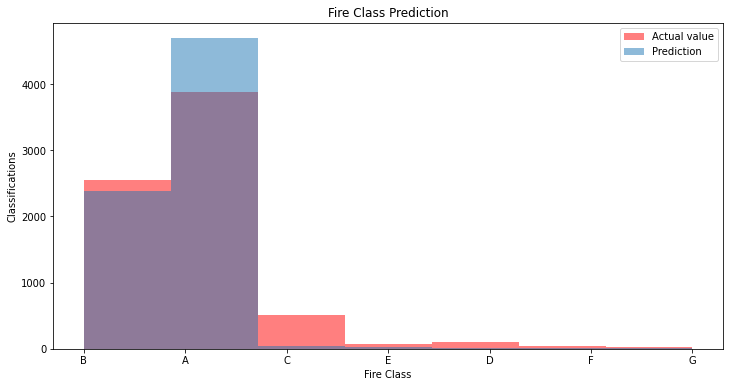

In [200]:
plt.figure(figsize=(12,6))
plt.hist(pd.Series(y_test).map(dict_2).to_numpy(), alpha=0.5, bins = 7, color = 'red')
plt.hist(pd.Series(model.predict(X_test)).map(dict_2).to_numpy(), alpha=0.5, bins = 7)
plt.legend(['Actual value', 'Prediction'])
plt.title('Fire Class Prediction')
plt.xlabel('Fire Class')
plt.ylabel('Classifications')
plt.savefig('fire class prediction.jpg')

In [189]:
pd.Series(y_test).map(dict_2).to_numpy()

array(['B', 'A', 'B', ..., 'A', 'A', 'B'], dtype=object)